In [1]:

import getdist
from getdist import plots, MCSamples
from getdist.paramnames import escapeLatex, makeList, mergeRenames
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
%matplotlib inline


g = plots.getSubplotPlotter(width_inch=8)

In [4]:
fiducial = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-clean-des-y3-fidA-nautilus.txt'
newfidA = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-clean-delve-dr3-fidA-nautilus.txt'
newfidB = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-clean-des-y3-fidB-nautilus.txt'
newfidC = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-clean-des-y3-fidC-nautilus.txt'

#imprintresp = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-response2_A.txt'
fiducial_chains = np.genfromtxt(fiducial, names=True)
newfidA_chains = np.genfromtxt(newfidA, names=True)
newfidB_chains = np.genfromtxt(newfidB, names=True)
newfidC_chains = np.genfromtxt(newfidC, names=True)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


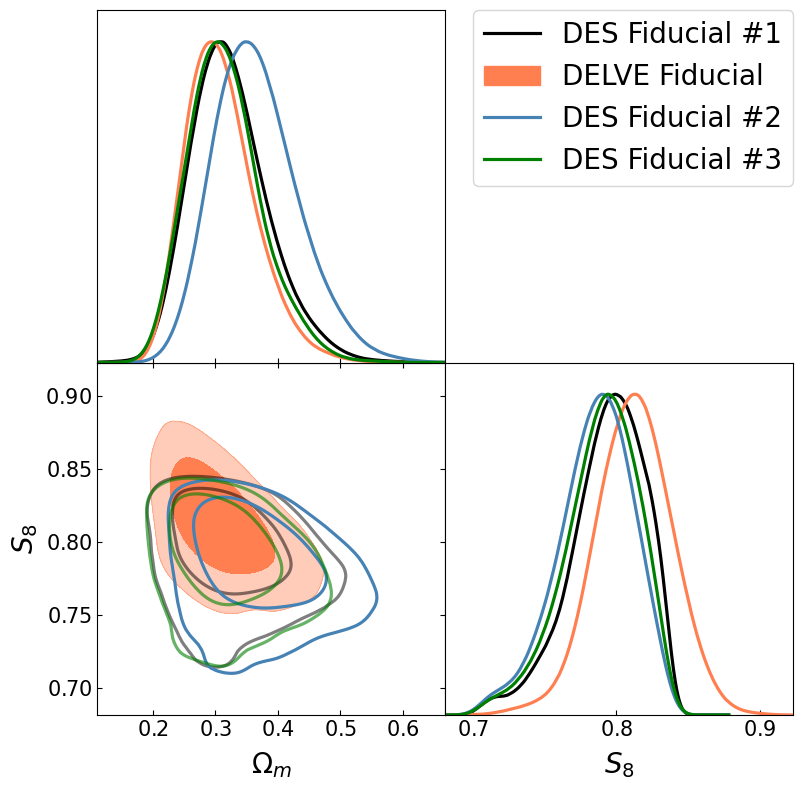

In [13]:

omm = 0.#,#0.03
oss = 0.#,#0.03
uu = fiducial_chains
fid_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                               (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s', '\Omega_b', 'h'])

uu = newfidA_chains
newfidA_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h'])


uu = newfidB_chains
newfidB_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h'])

uu = newfidC_chains
newfidC_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h'])


# uu = imprintresp_chains
# imprintresp_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
#                                 (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
#                                  uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
#                                  weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h'])



g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([fid_samples, newfidA_samples, newfidB_samples, newfidC_samples], ['Om', 's8'], filled=[False,True,False,False], 
                colors=['black', 'coral','steelblue', 'green'], alphas=[0.5,1, 1, 0.6],
                legend_labels=['DES Fiducial #1', 'DELVE Fiducial', 'DES Fiducial #2', 'DES Fiducial #3'],  legend_loc='upper right',fontsize=40, 
                contour_colors=['black', 'coral','steelblue', 'green'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])
plt.savefig('delvedr3_vmini.png', dpi=600, bbox_inches='tight', transparent=True)